####  Problem Statement
Given a random data set, classify the data accordingly for the best possible fit and create a prediction model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Create a dataframe from the csv file's data
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


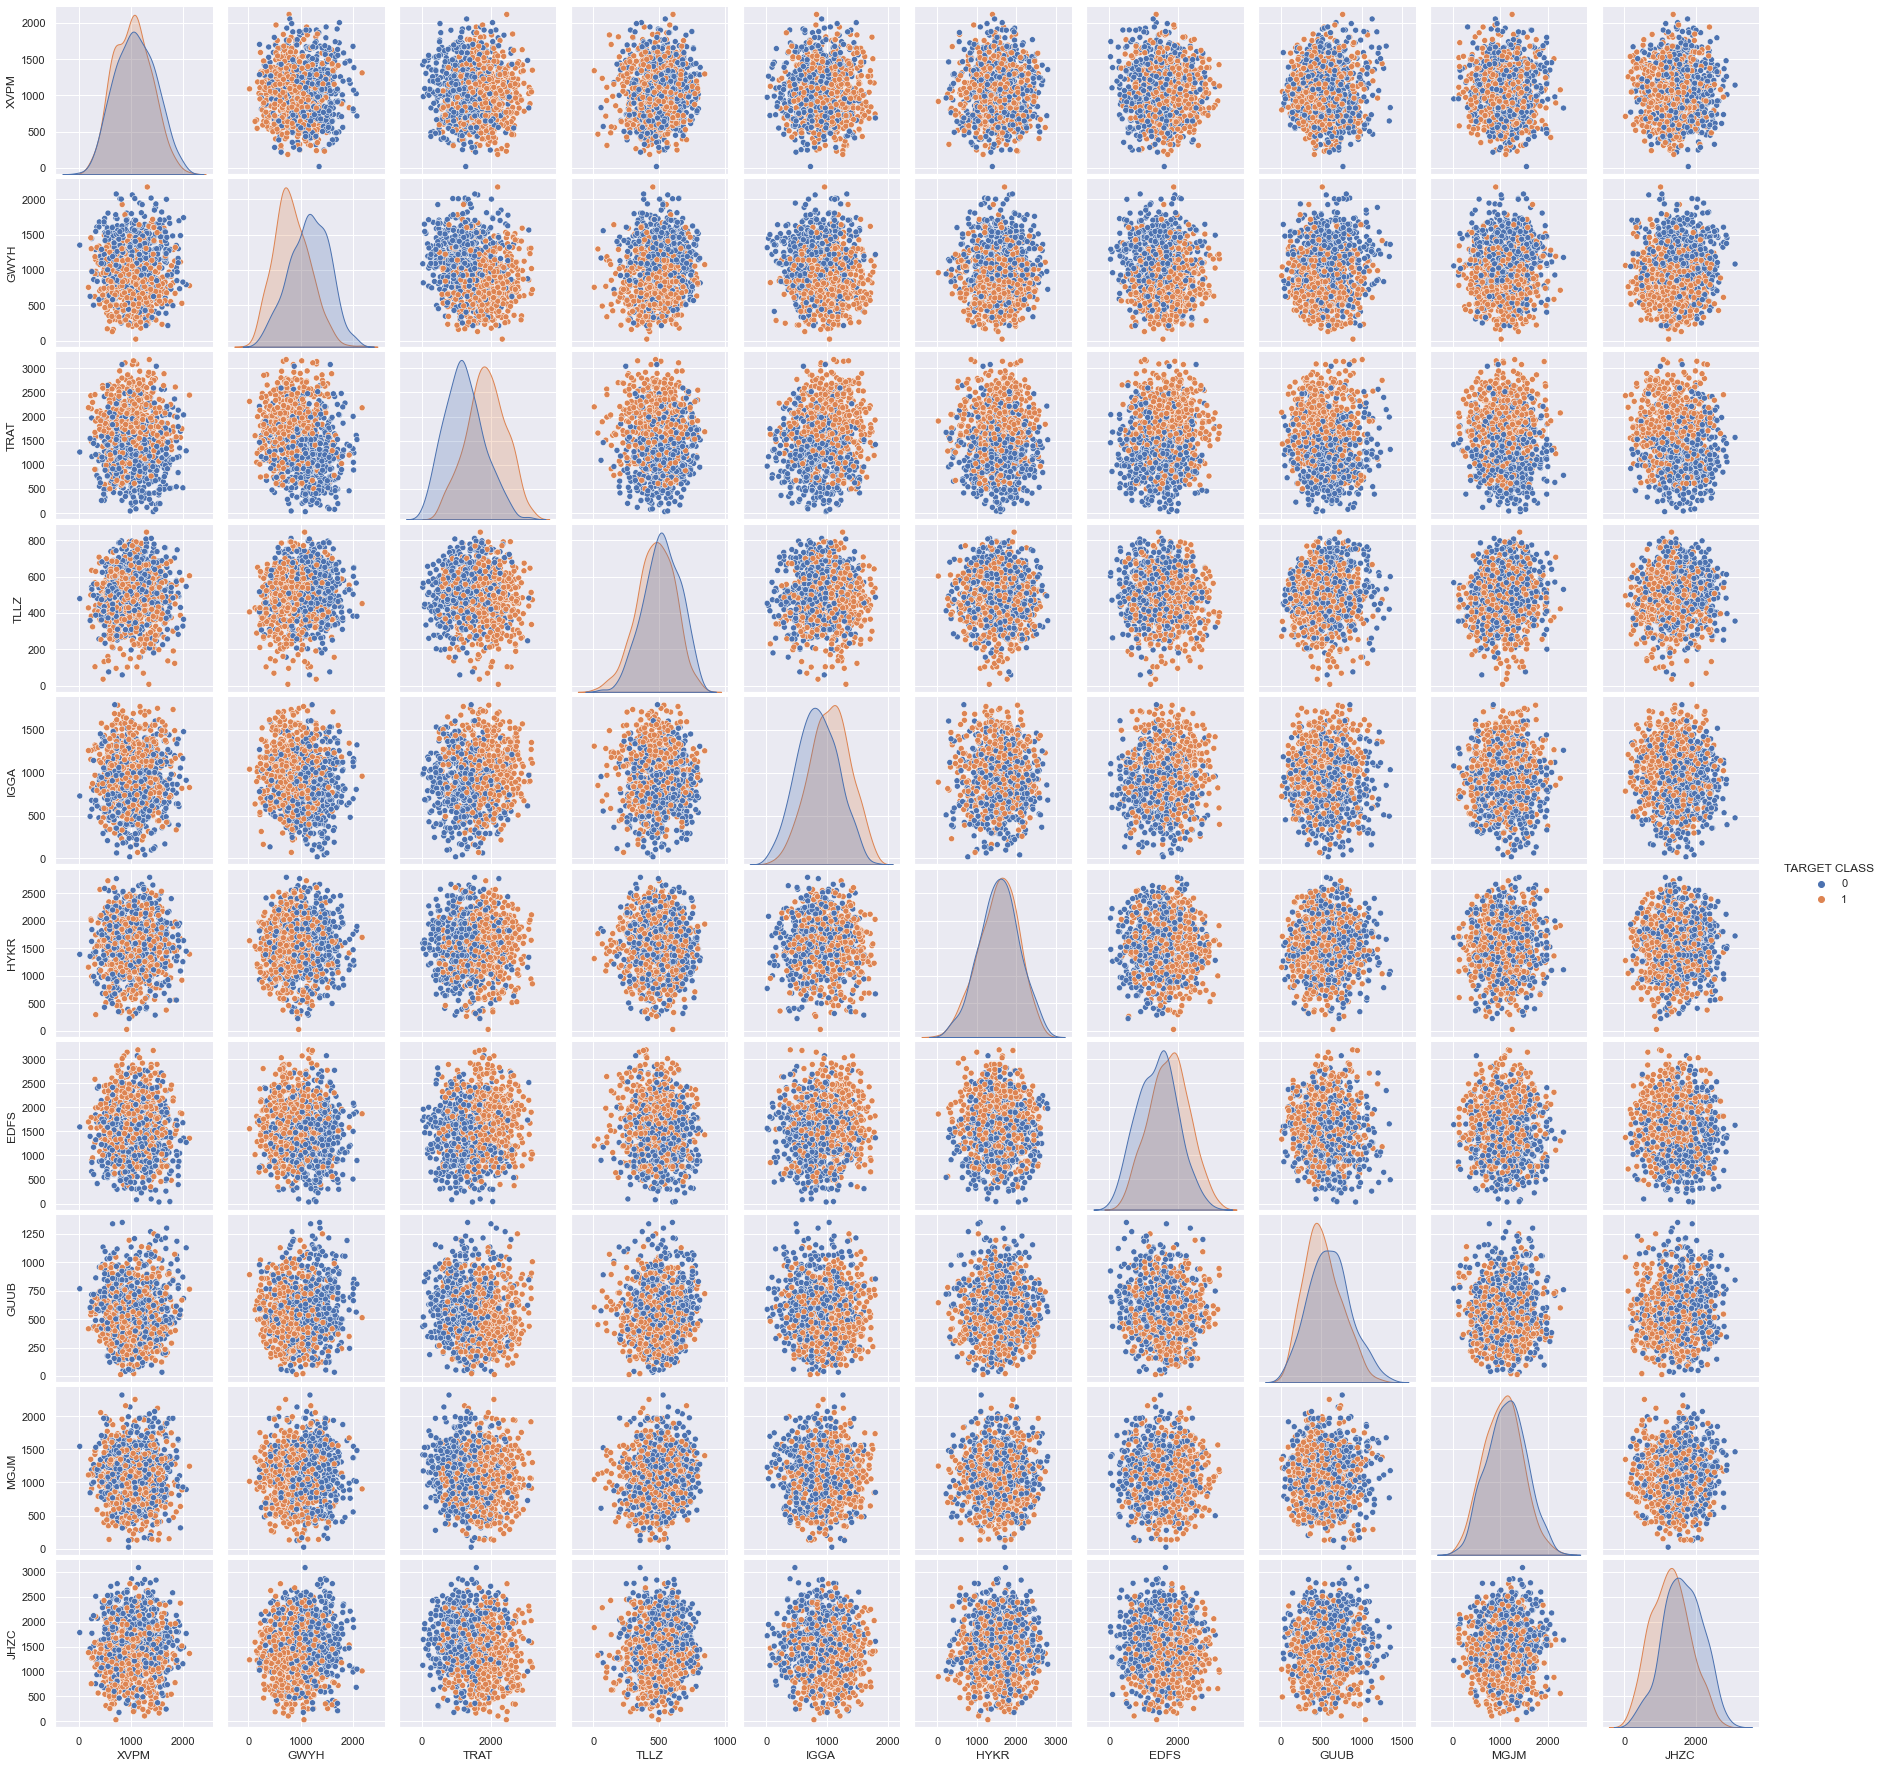

In [4]:
# Creating a pairplot and classifying based on the target class
sns.pairplot(df,hue = 'TARGET CLASS')

In [6]:
# Preprocessing through standard scaler
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.drop('TARGET CLASS', axis=1).columns)

In [12]:
# Doing the train test split on the data
from sklearn.model_selection import train_test_split

In [13]:
x = df_feat
y = df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
# Applying the KNN Technique with number of neighbours =1 initially
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
# Fitting the model for the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Prediction of the model
pred = knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test, pred))

[[110  44]
 [ 46 100]]


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       154
           1       0.69      0.68      0.69       146

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [22]:
# Checking for better k value for more accuracy of the model
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0, 0.5, 'Error Rate')

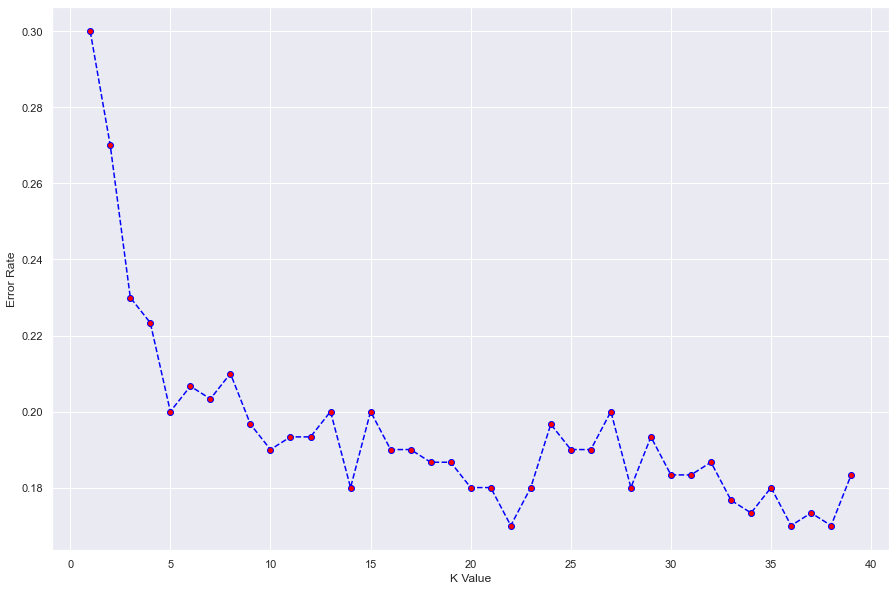

In [31]:
# The plot between the error rate and the k value range will help analyse the correct k value
plt.figure(figsize=(15,10))
plt.plot(range(1,40), error_rate, color ='blue', linestyle ='dashed', marker ='o', mfc='red')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [33]:
# Checking with k = 22, assumed minimum 
print('With K=22')
knn = KNeighborsClassifier(22)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

With K=22
[[122  32]
 [ 23 123]]


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       154
           1       0.79      0.84      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

